In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten

In [3]:
df01 = pd.read_csv("auckland_data.csv") #read origin file
print(df01.columns)

Index(['Date', 'Daily Average AQI', 'Daily Average NOx (ug/m3)',
       'Daily Average O3 (ug/m3)', 'Daily Average SO2 (ug/m3)',
       'Daily Average PM2.5 (ug/m3)', 'Daily Average PM10 (ug/m3)',
       'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)',
       'Rain(mm)', 'Tdry(C)', 'TWet(C)', 'RH(%)', 'Tmax(C)', 'Tmin(C)',
       'Tgmin(C)', 'ET05(C)', 'ET10(C)', 'ET20(C)', 'ET30(C)', 'ET100(C)',
       'Pmsl(hPa)', 'Pstn(hPa)', 'Sun(Hrs)', 'Rad(MJ/m2)', 'lightCount',
       'heavyCount'],
      dtype='object')


In [3]:
print(df01.describe())

       Daily Average AQI  Daily Average NOx (ug/m3)  Daily Average O3 (ug/m3)  \
count        1843.000000                1961.000000               1788.000000   
mean           26.618353                  29.077311                 38.244418   
std             8.280517                  16.349535                 11.899115   
min             7.510417                  -0.300000                  8.000000   
25%            21.118056                  16.560000                 29.000000   
50%            25.558333                  25.880000                 37.000000   
75%            31.229167                  38.160000                 47.000000   
max            87.402778                 121.960000                 70.630000   

       Daily Average SO2 (ug/m3)  Daily Average PM2.5 (ug/m3)  \
count                1798.000000                  1961.000000   
mean                    0.997664                     5.718027   
std                     0.982929                     2.446832   
min       

In [4]:
print(df01)

            Date  Daily Average AQI  Daily Average NOx (ug/m3)  \
0     2018-03-25          15.750000                     71.100   
1     2018-03-26          18.168981                     29.150   
2     2018-03-27          21.002114                     41.425   
3     2018-03-28          21.222222                     31.500   
4     2018-03-29          23.215278                     45.300   
...          ...                ...                        ...   
1973  2023-08-19          33.583333                     70.560   
1974  2023-08-20          19.513889                     20.700   
1975  2023-08-21          25.812500                     28.540   
1976  2023-08-22          38.287742                     21.100   
1977  2023-08-23          35.745833                     37.100   

      Daily Average O3 (ug/m3)  Daily Average SO2 (ug/m3)  \
0                        14.00                        NaN   
1                        19.00                        1.8   
2                       

In [5]:
# remove empty columns
df01 = df01.drop(['ET30(C)', 'ET05(C)'], axis=1)
df01['Date'] = pd.to_datetime(df01['Date'], format='%Y/%m/%d')
df01 = df01[df01['Date'] > '2019-12-31']

print(df01)

           Date  Daily Average AQI  Daily Average NOx (ug/m3)  \
647  2020-01-01          36.013889                      20.98   
648  2020-01-02          20.875000                      16.92   
649  2020-01-03          27.888889                      12.46   
650  2020-01-04          45.173611                      21.80   
651  2020-01-05          46.555556                      15.18   
...         ...                ...                        ...   
1973 2023-08-19          33.583333                      70.56   
1974 2023-08-20          19.513889                      20.70   
1975 2023-08-21          25.812500                      28.54   
1976 2023-08-22          38.287742                      21.10   
1977 2023-08-23          35.745833                      37.10   

      Daily Average O3 (ug/m3)  Daily Average SO2 (ug/m3)  \
647                      44.00                        0.2   
648                      30.00                        0.0   
649                      38.00      

In [6]:

selected_rows = df01['Daily Average AQI'][1250:1300]  #
print(selected_rows)


1897   NaN
1898   NaN
1899   NaN
1900   NaN
1901   NaN
1902   NaN
1903   NaN
1904   NaN
1905   NaN
1906   NaN
1907   NaN
1908   NaN
1909   NaN
1910   NaN
1911   NaN
1912   NaN
1913   NaN
1914   NaN
1915   NaN
1916   NaN
1917   NaN
1918   NaN
1919   NaN
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
1925   NaN
1926   NaN
1927   NaN
1928   NaN
1929   NaN
1930   NaN
1931   NaN
1932   NaN
1933   NaN
1934   NaN
1935   NaN
1936   NaN
1937   NaN
1938   NaN
1939   NaN
1940   NaN
1941   NaN
1942   NaN
1943   NaN
1944   NaN
1945   NaN
1946   NaN
Name: Daily Average AQI, dtype: float64


In [6]:
df01['Date'] = pd.to_datetime(df01['Date'], format='%Y/%m/%d')
df01['Month'] = df01['Date'].dt.month
df01['DayOfWeek'] = df01['Date'].dt.dayofweek
df01['IsWeekend'] = df01['Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)


In [7]:
print(df01)

           Date  Daily Average AQI  Daily Average NOx (ug/m3)  \
647  2020-01-01          36.013889                      20.98   
648  2020-01-02          20.875000                      16.92   
649  2020-01-03          27.888889                      12.46   
650  2020-01-04          45.173611                      21.80   
651  2020-01-05          46.555556                      15.18   
...         ...                ...                        ...   
1973 2023-08-19          33.583333                      70.56   
1974 2023-08-20          19.513889                      20.70   
1975 2023-08-21          25.812500                      28.54   
1976 2023-08-22          38.287742                      21.10   
1977 2023-08-23          35.745833                      37.10   

      Daily Average O3 (ug/m3)  Daily Average SO2 (ug/m3)  \
647                      44.00                        0.2   
648                      30.00                        0.0   
649                      38.00      

C:\Users\morga\AppData\Local\Temp\ipykernel_24296\2738221291.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df01.corr()


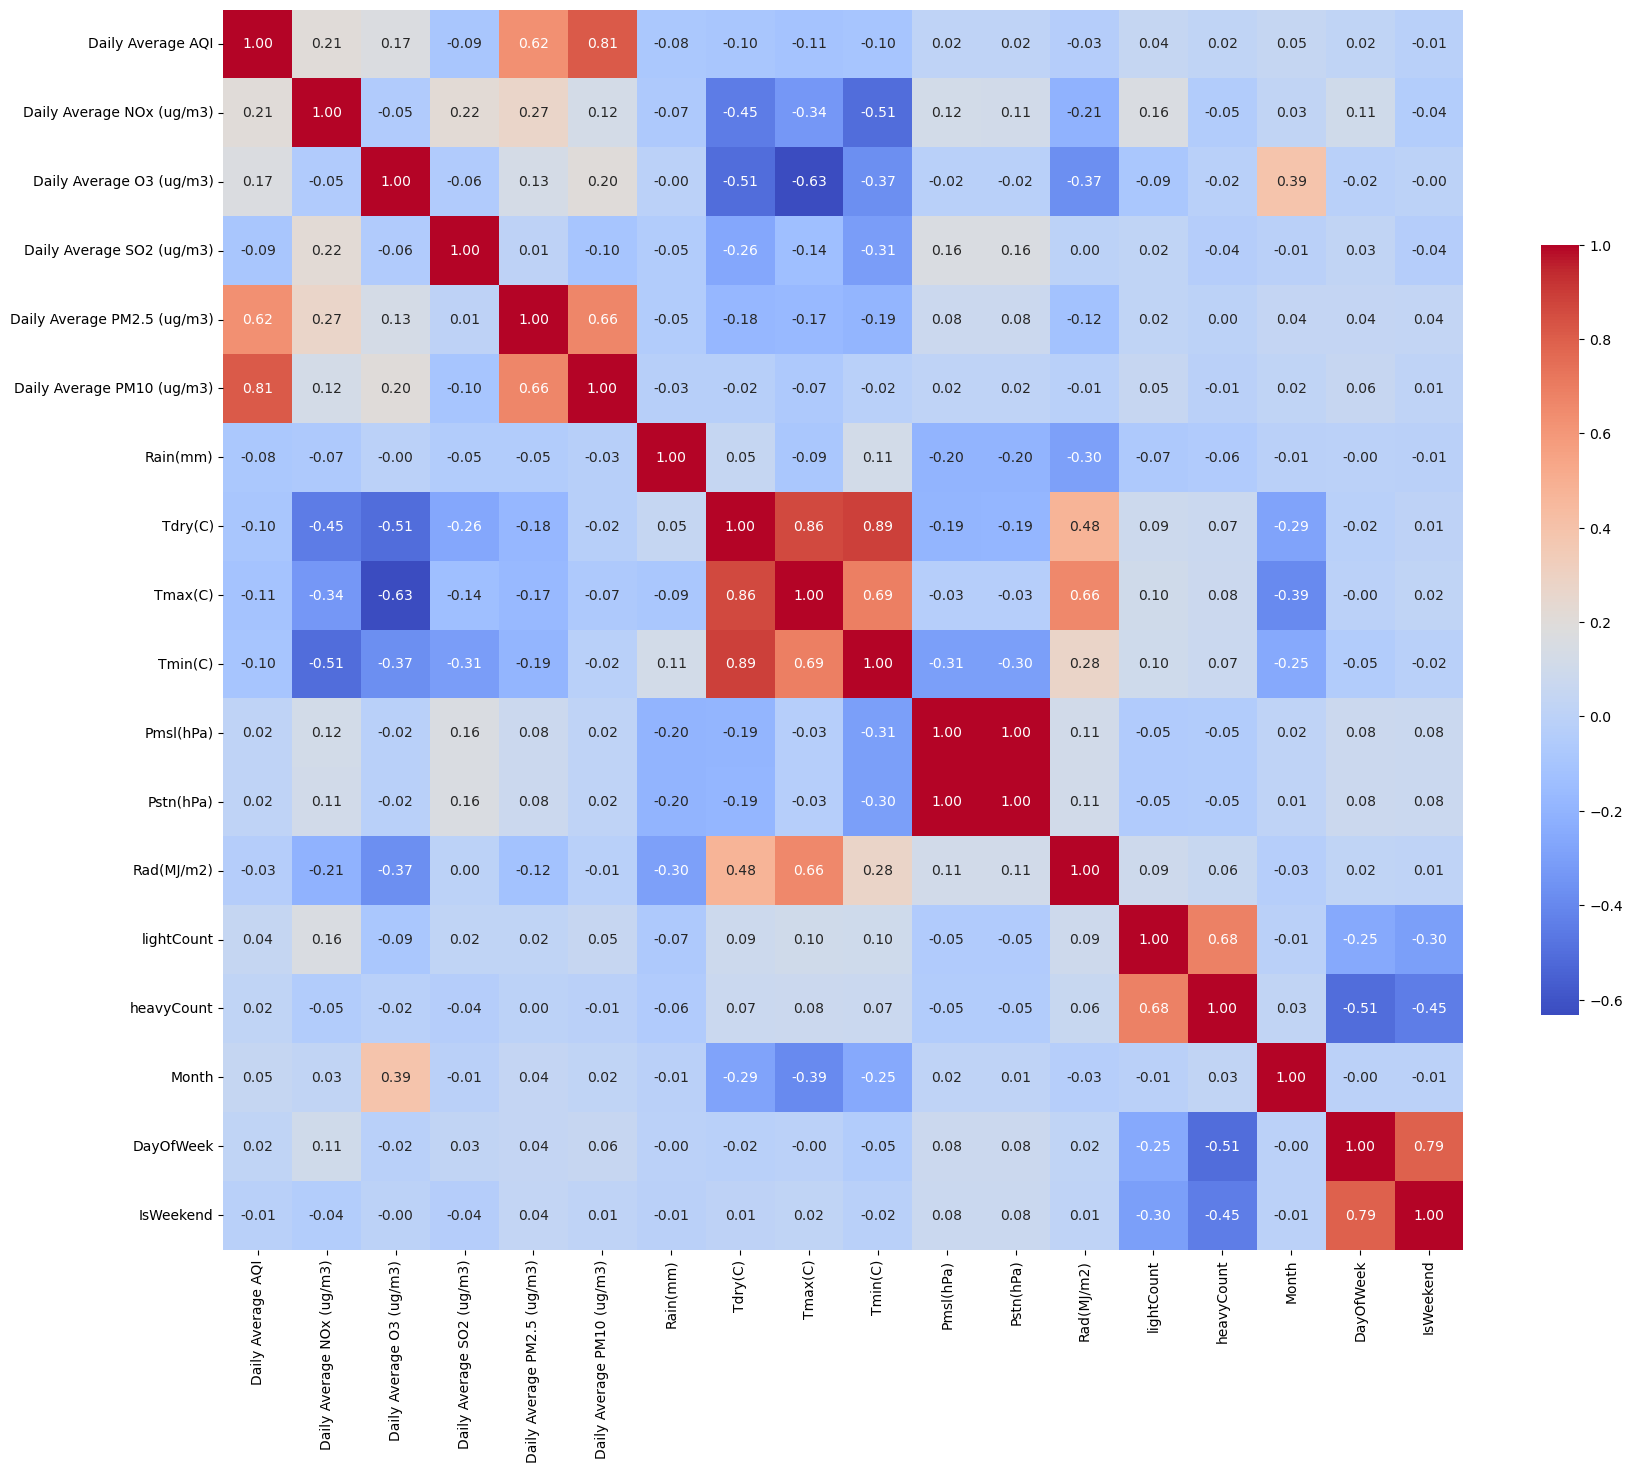

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df01.corr()


plt.figure(figsize=(20, 20))


sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap='coolwarm', cbar_kws={"shrink": .5})


plt.show()

In [9]:

for col in df01.columns:

    median = pd.to_numeric(df01[col], errors='coerce').median()

    df01[col] = pd.to_numeric(df01[col], errors='coerce').fillna(median)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l1

df01['Date'] = pd.to_datetime(df01['Date'], format='%Y/%m/%d')
df01['Date'] = df01['Date'].apply(lambda x: x.value)

features = df01.drop(columns=['Daily Average PM10 (ug/m3)', 'Daily Average PM2.5 (ug/m3)', 'Daily Average AQI'])
target = df01[['Daily Average PM10 (ug/m3)', 'Daily Average PM2.5 (ug/m3)', 'Daily Average AQI']]

input_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = input_scaler.fit_transform(features)


output_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = output_scaler.fit_transform(target)
                              

import joblib
joblib.dump(input_scaler, 'Auckland_input_scaler2.pkl')
joblib.dump(output_scaler, 'Auckland_output_scaler2.pkl')
                              
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))




In [11]:
print(df01)

                     Date  Daily Average AQI  Daily Average NOx (ug/m3)  \
647   1577836800000000000          36.013889                      20.98   
648   1577923200000000000          20.875000                      16.92   
649   1578009600000000000          27.888889                      12.46   
650   1578096000000000000          45.173611                      21.80   
651   1578182400000000000          46.555556                      15.18   
...                   ...                ...                        ...   
1973  1692403200000000000          33.583333                      70.56   
1974  1692489600000000000          19.513889                      20.70   
1975  1692576000000000000          25.812500                      28.54   
1976  1692662400000000000          38.287742                      21.10   
1977  1692748800000000000          35.745833                      37.10   

      Daily Average O3 (ug/m3)  Daily Average SO2 (ug/m3)  \
647                      44.00        

In [12]:
from tensorflow.keras.layers import Dropout, MaxPooling1D


model = Sequential()


model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))


model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))


model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(3))

model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)





Epoch 1/100

34/34 - 4s - loss: 0.0875 - val_loss: 0.0190 - 4s/epoch - 114ms/step
Epoch 2/100
34/34 - 1s - loss: 0.0266 - val_loss: 0.0234 - 735ms/epoch - 22ms/step
Epoch 3/100
34/34 - 1s - loss: 0.0239 - val_loss: 0.0178 - 810ms/epoch - 24ms/step
Epoch 4/100
34/34 - 1s - loss: 0.0227 - val_loss: 0.0177 - 787ms/epoch - 23ms/step
Epoch 5/100
34/34 - 1s - loss: 0.0212 - val_loss: 0.0180 - 706ms/epoch - 21ms/step
Epoch 6/100
34/34 - 1s - loss: 0.0201 - val_loss: 0.0174 - 743ms/epoch - 22ms/step
Epoch 7/100
34/34 - 1s - loss: 0.0201 - val_loss: 0.0175 - 768ms/epoch - 23ms/step
Epoch 8/100
34/34 - 1s - loss: 0.0194 - val_loss: 0.0165 - 744ms/epoch - 22ms/step
Epoch 9/100
34/34 - 1s - loss: 0.0189 - val_loss: 0.0160 - 733ms/epoch - 22ms/step
Epoch 10/100
34/34 - 1s - loss: 0.0192 - val_loss: 0.0156 - 762ms/epoch - 22ms/step
Epoch 11/100
34/34 - 1s - loss: 0.0186 - val_loss: 0.0157 - 763ms/epoch - 22ms/step
Epoch 12/100
34/34 - 1s - loss: 0.0180 - val_loss: 0.0166 - 720ms/epoch - 21ms/step

34/34 - 1s - loss: 0.0119 - val_loss: 0.0124 - 696ms/epoch - 20ms/step
Epoch 91/100
34/34 - 1s - loss: 0.0122 - val_loss: 0.0124 - 719ms/epoch - 21ms/step
Epoch 92/100
34/34 - 1s - loss: 0.0122 - val_loss: 0.0128 - 754ms/epoch - 22ms/step
Epoch 93/100
34/34 - 1s - loss: 0.0119 - val_loss: 0.0125 - 721ms/epoch - 21ms/step
Epoch 94/100
34/34 - 1s - loss: 0.0119 - val_loss: 0.0129 - 696ms/epoch - 20ms/step
Epoch 95/100
34/34 - 1s - loss: 0.0124 - val_loss: 0.0128 - 709ms/epoch - 21ms/step
Epoch 96/100
34/34 - 1s - loss: 0.0123 - val_loss: 0.0124 - 722ms/epoch - 21ms/step
Epoch 97/100
34/34 - 1s - loss: 0.0121 - val_loss: 0.0125 - 676ms/epoch - 20ms/step
Epoch 98/100
34/34 - 1s - loss: 0.0116 - val_loss: 0.0120 - 735ms/epoch - 22ms/step
Epoch 99/100
34/34 - 1s - loss: 0.0119 - val_loss: 0.0126 - 688ms/epoch - 20ms/step
Epoch 100/100
34/34 - 0s - loss: 0.0119 - val_loss: 0.0122 - 477ms/epoch - 14ms/step


In [13]:
print(df01.columns.tolist())

['Date', 'Daily Average AQI', 'Daily Average NOx (ug/m3)', 'Daily Average O3 (ug/m3)', 'Daily Average SO2 (ug/m3)', 'Daily Average PM2.5 (ug/m3)', 'Daily Average PM10 (ug/m3)', 'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)', 'Rain(mm)', 'Tdry(C)', 'TWet(C)', 'RH(%)', 'Tmax(C)', 'Tmin(C)', 'Tgmin(C)', 'ET10(C)', 'ET20(C)', 'ET100(C)', 'Pmsl(hPa)', 'Pstn(hPa)', 'Sun(Hrs)', 'Rad(MJ/m2)', 'lightCount', 'heavyCount', 'Month', 'DayOfWeek', 'IsWeekend']


In [14]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

Test Loss: 0.012212243862450123


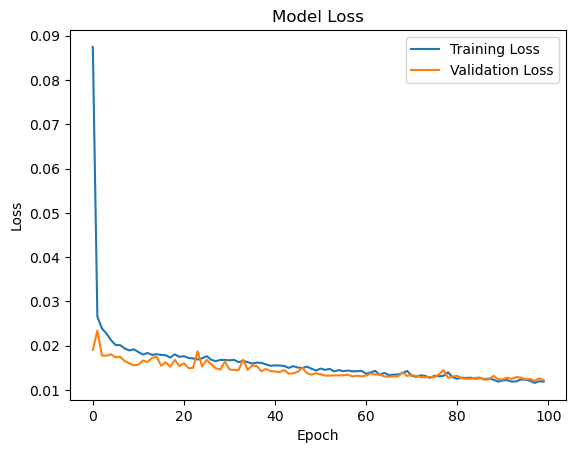

In [15]:
import matplotlib.pyplot as plt

# 绘制损失图
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

9/9 [==============================] - 0s 8ms/step


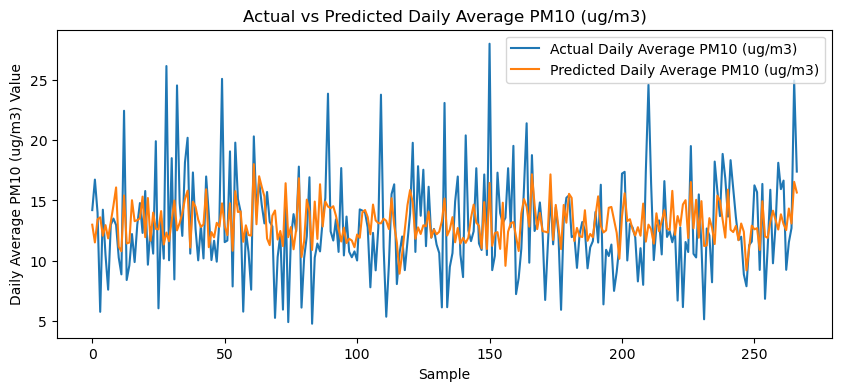

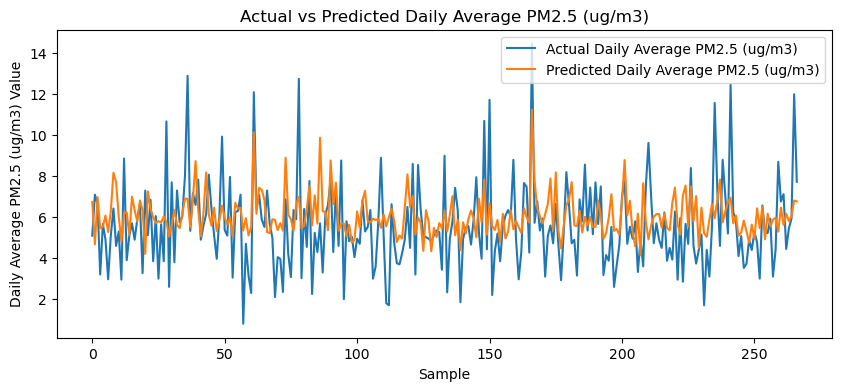

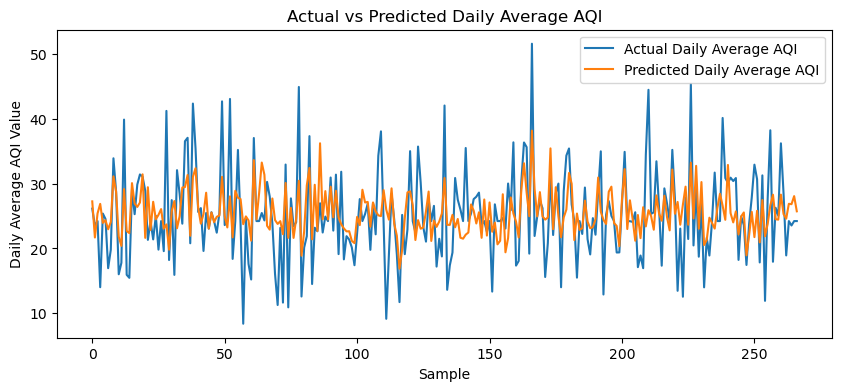

In [16]:

predictions = model.predict(X_test)


predictions_inversed = output_scaler.inverse_transform(predictions)
y_test_inversed = output_scaler.inverse_transform(y_test)


target_labels = ['Daily Average PM10 (ug/m3)', 'Daily Average PM2.5 (ug/m3)', 'Daily Average AQI']
for i in range(3):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_inversed[:, i], label=f'Actual {target_labels[i]}')
    plt.plot(predictions_inversed[:, i], label=f'Predicted {target_labels[i]}')
    plt.title(f'Actual vs Predicted {target_labels[i]}')
    plt.ylabel(f'{target_labels[i]} Value')
    plt.xlabel('Sample')
    plt.legend()
    plt.show()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 13, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 128)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def analyze_rnn_model(model, X_train, y_train, X_test, y_test):

    model.summary()


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R2 Score: {train_r2}")
    print(f"Test R2 Score: {test_r2}")


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Train Set')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Test Set')
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 13, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 128)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0

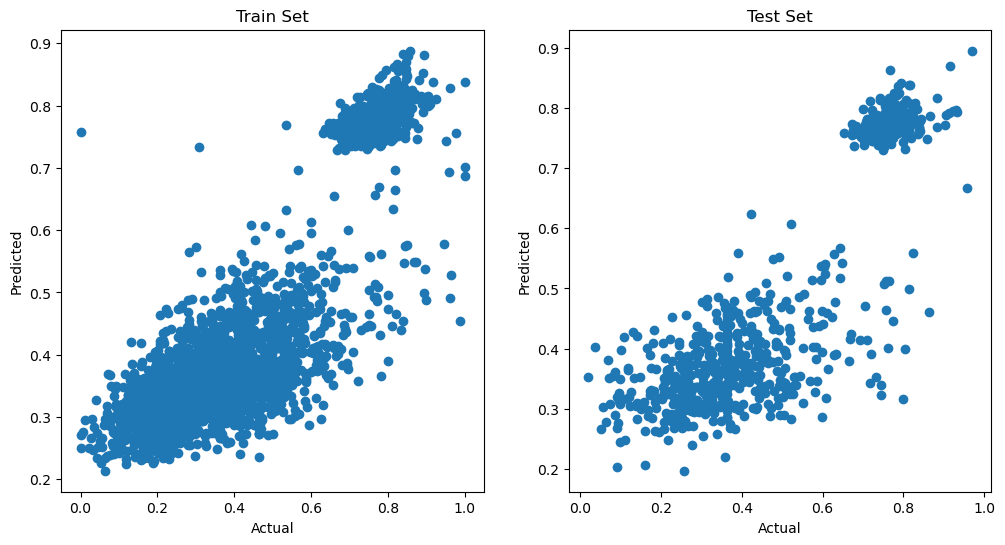

In [19]:
analyze_rnn_model(model, X_train, y_train, X_test, y_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam


def build_model():
    model = Sequential()

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))


    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))


    model.add(LSTM(60, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))


    model.add(Dense(3))


    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


model = build_model()


history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100
43/43 - 3s - loss: 0.0618 - val_loss: 0.0275 - 3s/epoch - 75ms/step
Epoch 2/100
43/43 - 1s - loss: 0.0256 - val_loss: 0.0222 - 799ms/epoch - 19ms/step
Epoch 3/100
43/43 - 1s - loss: 0.0242 - val_loss: 0.0175 - 764ms/epoch - 18ms/step
Epoch 4/100
43/43 - 1s - loss: 0.0226 - val_loss: 0.0193 - 742ms/epoch - 17ms/step
Epoch 5/100
43/43 - 1s - loss: 0.0209 - val_loss: 0.0176 - 780ms/epoch - 18ms/step
Epoch 6/100
43/43 - 1s - loss: 0.0201 - val_loss: 0.0199 - 791ms/epoch - 18ms/step
Epoch 7/100
43/43 - 1s - loss: 0.0203 - val_loss: 0.0159 - 804ms/epoch - 19ms/step
Epoch 8/100
43/43 - 1s - loss: 0.0202 - val_loss: 0.0154 - 812ms/epoch - 19ms/step
Epoch 9/100
43/43 - 1s - loss: 0.0192 - val_loss: 0.0156 - 792ms/epoch - 18ms/step
Epoch 10/100
43/43 - 1s - loss: 0.0191 - val_loss: 0.0164 - 808ms/epoch - 19ms/step
Epoch 11/100
43/43 - 1s - loss: 0.0189 - val_loss: 0.0150 - 826ms/epoch - 19ms/step
Epoch 12/100
43/43 - 1s - loss: 0.0189 - val_loss: 0.0157 - 859ms/epoch - 20ms/step
Epoc

Epoch 99/100
43/43 - 1s - loss: 0.0113 - val_loss: 0.0135 - 815ms/epoch - 19ms/step
Epoch 100/100
43/43 - 1s - loss: 0.0119 - val_loss: 0.0128 - 780ms/epoch - 18ms/step


In [21]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

Test Loss: 0.012776068411767483


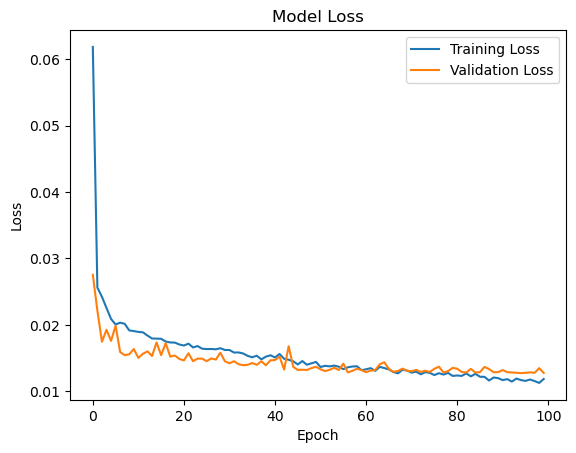

In [22]:
import matplotlib.pyplot as plt

# 绘制损失图
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

9/9 [==============================] - 0s 7ms/step


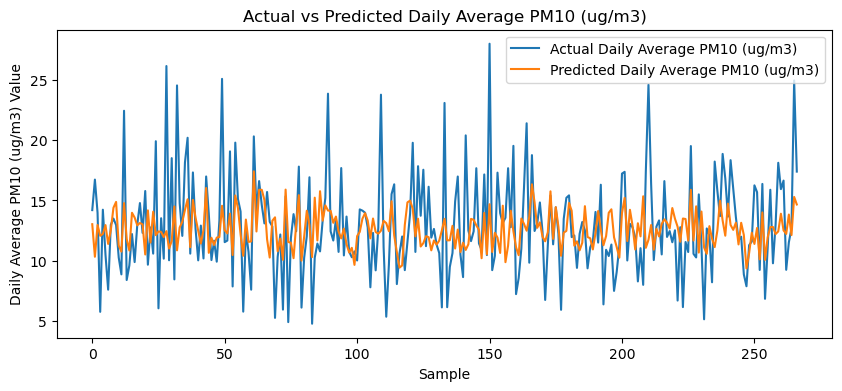

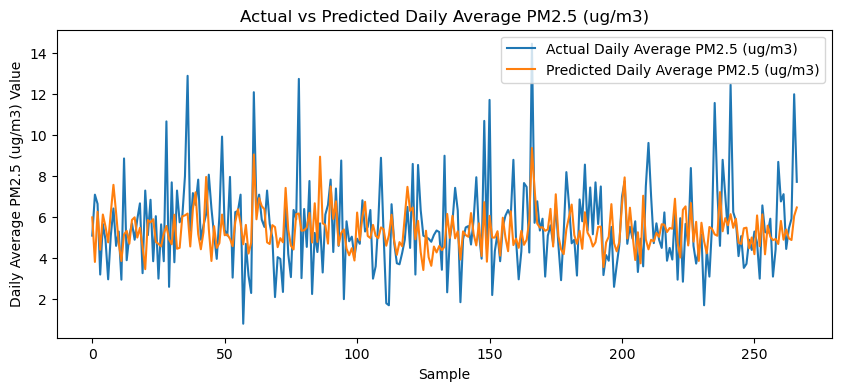

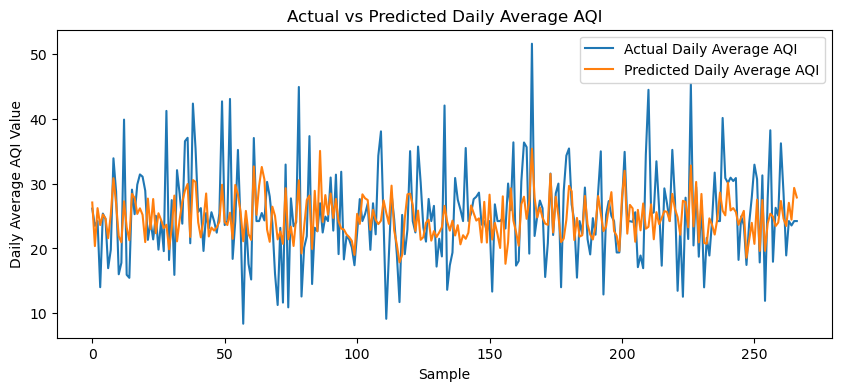

In [23]:
predictions = model.predict(X_test)


predictions_inversed = output_scaler.inverse_transform(predictions)
y_test_inversed = output_scaler.inverse_transform(y_test)

target_labels = ['Daily Average PM10 (ug/m3)', 'Daily Average PM2.5 (ug/m3)', 'Daily Average AQI']
for i in range(3):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_inversed[:, i], label=f'Actual {target_labels[i]}')
    plt.plot(predictions_inversed[:, i], label=f'Predicted {target_labels[i]}')
    plt.title(f'Actual vs Predicted {target_labels[i]}')
    plt.ylabel(f'{target_labels[i]} Value')
    plt.xlabel('Sample')
    plt.legend()
    plt.show()

In [24]:

y_pred = model.predict(X_test)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


9/9 [==============================] - 0s 7ms/step
Mean Absolute Percentage Error (MAPE): 29.35091707302913 %


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 26, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 13, 64)            0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 64)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 11, 128)           24704     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 5, 128)            0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 128)           

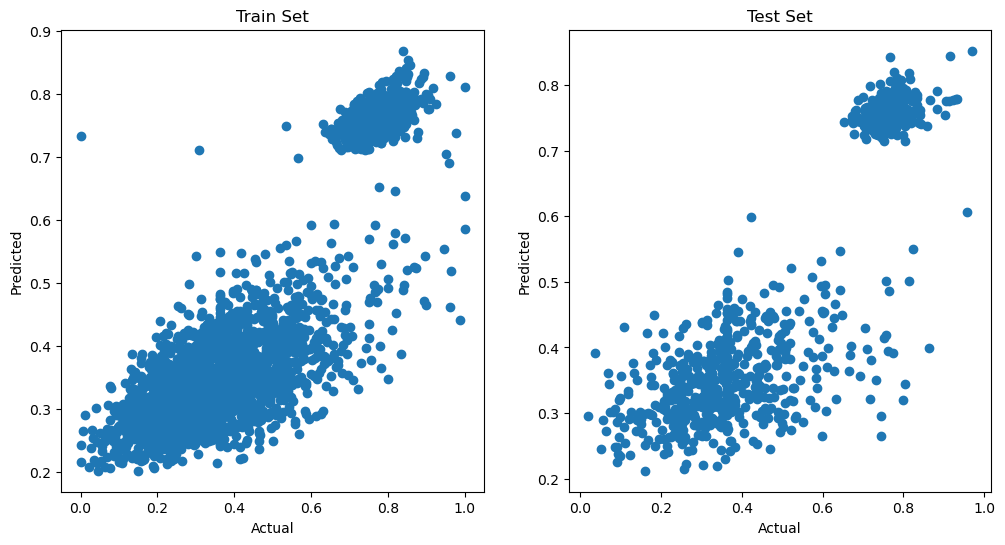

In [25]:
analyze_rnn_model(model, X_train, y_train, X_test, y_test)

In [26]:
print(X_train.shape[1], X_train.shape[2])

28 1


In [27]:
print(df01.head())


first_row = df01.iloc[0]
print("第一行数据：")
print(first_row)

                    Date  Daily Average AQI  Daily Average NOx (ug/m3)  \
647  1577836800000000000          36.013889                      20.98   
648  1577923200000000000          20.875000                      16.92   
649  1578009600000000000          27.888889                      12.46   
650  1578096000000000000          45.173611                      21.80   
651  1578182400000000000          46.555556                      15.18   

     Daily Average O3 (ug/m3)  Daily Average SO2 (ug/m3)  \
647                      44.0                        0.2   
648                      30.0                        0.0   
649                      38.0                        0.0   
650                      42.0                        0.0   
651                      38.0                        0.0   

     Daily Average PM2.5 (ug/m3)  Daily Average PM10 (ug/m3)  WDir(Deg)  \
647                        7.800                   16.471429        317   
648                        6.875            

In [28]:
model.save('auckland_cnnlstm.h5') 

D:\Anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


D:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but MinMaxScaler is expecting 28 features as input.

In [30]:

print("输入样本的原始特征值:")
print(sample_features)


输入样本的原始特征值:
Date                         1.578701e+18
Daily Average NOx (ug/m3)    3.292500e+01
Daily Average O3 (ug/m3)     3.300000e+01
Daily Average SO2 (ug/m3)    0.000000e+00
WDir(Deg)                    1.830000e+02
WSpd(m/s)                    2.300000e+00
GustDir(Deg)                 1.800000e+02
GustSpd(m/s)                 7.200000e+00
WindRun(Km)                  1.700000e+02
Rain(mm)                     0.000000e+00
Tdry(C)                      1.740000e+01
TWet(C)                      1.500000e+01
RH(%)                        7.600000e+01
Tmax(C)                      2.410000e+01
Tmin(C)                      1.070000e+01
Tgmin(C)                     7.100000e+00
ET10(C)                      1.810000e+01
ET20(C)                      1.800000e+01
ET100(C)                     1.890000e+01
Pmsl(hPa)                    1.021100e+03
Pstn(hPa)                    1.019200e+03
Sun(Hrs)                     1.340000e+01
Rad(MJ/m2)                   2.666000e+01
lightCount            

In [31]:

original_scale_prediction = output_scaler.inverse_transform(prediction)


print("反缩放后的预测目标值:")
print(original_scale_prediction)


反缩放后的预测目标值:
[[-2.2927865e+19  3.3694277e+19 -4.2910007e+19]]


In [32]:

target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(target)


original_scale_prediction = target_scaler.inverse_transform(prediction)

print("反缩放后的预测目标值:")
print(original_scale_prediction)


反缩放后的预测目标值:
[[-2.2927865e+19  3.3694277e+19 -4.2910007e+19]]
